In [1]:
# Importing the important packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline

# Step1: Data Collection 

In [2]:
# This is the original data of cryptocurrency that has been collected from the Kaggle Repository. 
# In our research, we have taken Ethereum & ADA Cardano coins to better understand the forecasting using 
# AutoRegressive Integrated Moving Average (ARIMA) which is a supervised machine learning technique for non-linear regression data.
# Machine Learning technique. Ethereum and ADA Cardano are both comparatively very stable and popular coins with
# high investment.
df = pd.read_csv("ADA-USD.csv")

# Step2: Data Preparation

In [3]:
# We need to prepare the data for the Machine Learning model.It is a Regression case where the dependent variable
# i.e. Y (output) is qualitative.Therefore, we need to prepare our csv file for the Regression algorithm.


In [4]:
print(df)

                timestamp  adjclose      open      high     volume       low  \
0     2017-11-09 00:00:00  0.032053  0.025160  0.035060   18716200  0.025006   
1     2017-11-10 00:00:00  0.027119  0.032219  0.033348    6766780  0.026451   
2     2017-11-11 00:00:00  0.027437  0.026891  0.029659    5532220  0.025684   
3     2017-11-12 00:00:00  0.023977  0.027480  0.027952    7280250  0.022591   
4     2017-11-13 00:00:00  0.025808  0.024364  0.026300    4419440  0.023495   
...                   ...       ...       ...       ...        ...       ...   
1780  2022-09-24 00:00:00  0.451600  0.461830  0.467096  582129449  0.451294   
1781  2022-09-25 00:00:00  0.446188  0.451599  0.461773  528836100  0.440216   
1782  2022-09-26 00:00:00  0.446757  0.446299  0.450270  630690579  0.438234   
1783  2022-09-27 00:00:00  0.441890  0.446819  0.462494  683067297  0.438172   
1784  2022-09-28 08:54:00  0.429608  0.441767  0.442514  668548800  0.426501   

         close  
0     0.032053  
1    

In [5]:
# Data Cleaning: 
# In the CSV(Comma Separated Values) file of each coin,we can see that there are 7 features in total, indicating
# the coin timestamp(in 24 hrs), adjusted close,open(coin ),high,volume,low and close .Out of these features,
# the "Adjusted Close" has been considered as the dependent Variable (Y).

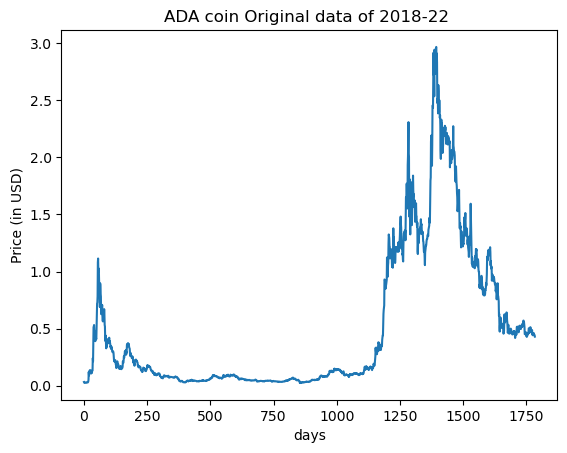

In [6]:

plt.plot(df.index, df['adjclose'])
plt.title('ADA coin Original data of 2018-22 ')
plt.xlabel('days')
plt.ylabel('Price (in USD)')
plt.show()

In [7]:
# Feature Selection:
# Since it is a Time-Series Analysis problem, where the Y (output) is dependent only on time.
#Therefore,the 'timestamp' feature is considered as the only independent variable 'x'.
# The 'Adjusted close' column is treated as the dependent variable "Y" or the predictor variable.
  
# Converting the'x'variable i.e. the Days column in to date-time format, to be treated as the index of Y here.
df['timestamp'] = pd.to_datetime(df["timestamp"])
df.set_index('timestamp', inplace = True)


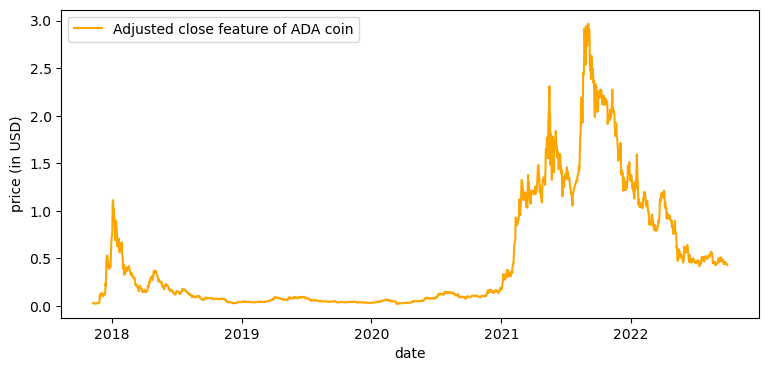

In [8]:
plt.figure(figsize=(9,4))
plt.plot(df['adjclose'],color='orange', label= 'Adjusted close feature of ADA coin')
plt.xlabel("date")
plt.ylabel('price (in USD)')
plt.legend()
plt.show()

# Step 3: Exploratory Data Analysis(EDA)

Text(0, 0.5, 'price (in USD)')

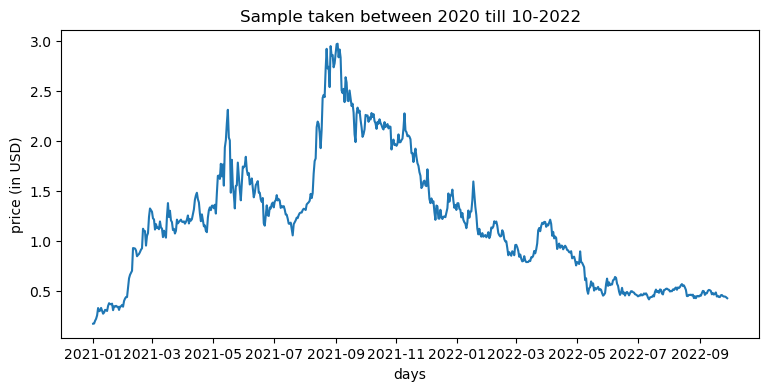

In [9]:
# Step 1: Feature Engineering
# The dependent variable (Y) is taken as a sample, starting from 2020-01 till the end date i.e. 28-09-2022.
# Because we can examine that from 2018 till 12-2019, the data is almost stationary which may not contribute much in the
# forecasting and thus,causes overfitting.Whereas, from 2020 till 9-2022, the data is juggling,which is suitable for
# the model fitting and that contributes better to behave consistantly in prediction with the recent trend.
plt.figure(figsize=(9,4))
df = df.loc['2021-01' : '2022']
plt.plot(df['adjclose'])
plt.title("Sample taken between 2020 till 10-2022" )
plt.xlabel("days")
plt.ylabel("price (in USD)")

In [10]:
# Dataset with date index (X - independent variable)
df['adjclose']

timestamp
2021-01-01 00:00:00    0.175350
2021-01-02 00:00:00    0.177423
2021-01-03 00:00:00    0.204995
2021-01-04 00:00:00    0.224762
2021-01-05 00:00:00    0.258314
                         ...   
2022-09-24 00:00:00    0.451600
2022-09-25 00:00:00    0.446188
2022-09-26 00:00:00    0.446757
2022-09-27 00:00:00    0.441890
2022-09-28 08:54:00    0.429608
Name: adjclose, Length: 636, dtype: float64

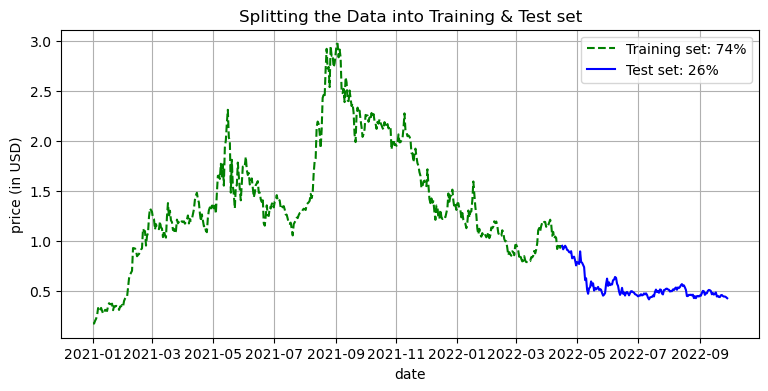

In [11]:
#step1: Feature Engineering/Variable Engineering:
# By analyzing the data graphically, we have divided the selected data (i.e. 9-2020 till 9-2022) sequentially into
# two samples i.e. training set and test. The initial 74% data is treated as our training set which has been used to 
# train the machine learning model/algorithm.While the remaining 26% data is taken as the test set which is used to 
# assess the performance of the trained model and to provide the estimation to the test error.

plt.figure(figsize=(9,4))
plt.grid(True)
to_row = int(len(df)*0.74)
training_data = list(df[0:to_row]['adjclose'])
testing_data = list(df[to_row:]['adjclose'])
plt.plot(df[0:to_row]['adjclose'],color='green', label= 'Training set: 74%',linestyle ='dashed')
plt.plot(df[to_row:]['adjclose'],color='blue', label= 'Test set: 26%')
plt.title("Splitting the Data into Training & Test set")
plt.xlabel("date")
plt.ylabel('price (in USD)')
plt.legend()
plt.show()

In [12]:
# Step 2: After the data is splitted into training set and test set,we need to check the stationarity 
# of the training set since it will be used to train the Machine Learning model.


In [13]:
# Testing for Stationarity of training set:
# Method1: 
# For checking the stationarity of training set, we have used (Augmented Dicky Fuller), also called Adfuller test.
# Using Dicky fuller test, the hypothesis testing with p-value= 0.05 is computed by considering the Null hypothesis(H0) as non-stationary
# and Alternate hypothesis (H1),representing the training data as stationary.
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(training_data)

In [14]:
# Hypothesis Testing

# H0  = The training dataset is non- stationary
# H1  = The training dataset is Stationary
def adfuller_test(adjclose):
    result=adfuller(adjclose)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [15]:
# Adfuller test result:
adfuller_test(training_data)

ADF Test Statistic : -2.1944230688556847
p-value : 0.2082757842892864
#Lags Used : 1
Number of Observations Used : 468
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [16]:
# Since the training set is Non-stationary, therefore,we need to make it stationary by taking the differentiation of 
# data with different orders i.e. the value 'q' of the ARIMA Model,until it becomes stationary.
# It can also be done with Auto-ARIMA or by visualizing the Auto-Correlation Function(ACF plot) having different differentiation orders of the data.

In [17]:
# Making the training set stationary by taking the first order difference
df['First Difference'] = df['adjclose'] - df['adjclose'].shift(1)

In [18]:
# Checking for 1 shift
df['First Difference']

timestamp
2021-01-01 00:00:00         NaN
2021-01-02 00:00:00    0.002073
2021-01-03 00:00:00    0.027572
2021-01-04 00:00:00    0.019767
2021-01-05 00:00:00    0.033552
                         ...   
2022-09-24 00:00:00   -0.010221
2022-09-25 00:00:00   -0.005412
2022-09-26 00:00:00    0.000569
2022-09-27 00:00:00   -0.004867
2022-09-28 08:54:00   -0.012282
Name: First Difference, Length: 636, dtype: float64

In [19]:
# Removing the 'Nan' values and Applying the adfuller test to check for the P-value 
adfuller_test(df['First Difference'].dropna())
# Since the training set became stationary after taking the first order difference since the p value is became increased,therefore we may set the d value of ARIMA model as 1.

ADF Test Statistic : -6.706025392656698
p-value : 3.783349632050643e-09
#Lags Used : 9
Number of Observations Used : 625
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


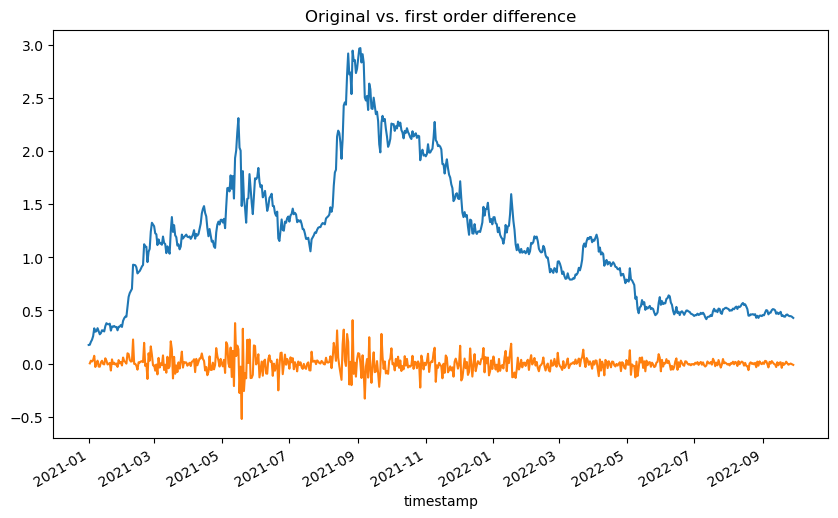

In [20]:
# Visualizing the Stationarity 
plt.figure(figsize=(10,6))
plt.title("Original vs. first order difference")
df['adjclose'].plot()
#df['First Difference'].plot()
#plt.plot(df['adjclose'], label = 'original')
plt.plot(df['First Difference'], label ='stationary with 1st order ')

In [21]:
# Before applying the ARIMA model,we need to analyze the data and find out the 3 parameters of ARIMA model
# which are (AR, I, MA) also called (P,d,q), where 'p' is called Auto-Regressive, 'd' is the Integrated part which is the order of difference to make the data stationary
# and 'q' is called the Moving-Average.


In [22]:
# Method 1: Using Auto-ARIMA technique to find the value of (p,d,q). In Auto ARIMA, the model itself will generate 
#the optimal p, d, and q values which would be suitable for the data set to provide better prediction.
# This technique computes the optimal value of p, d, and q by using different combinations and the final values
#would be determined with the lower AIC(Akaike information criterion (AIC)), BIC(Bayesian information criterion)
# parameters taking into consideration.


# Finding the order of the ARIMA model i.e. to identify the P,d,q values by using Auto-ARIMA
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [23]:
step_wise_fit = auto_arima(list(df[0:to_row]['adjclose']), trace=True, suppress_warnings=True)
# Here we can see that the order(p,d,q)=(1,1,1) is having lower AIC score that is -923 compared to other orders
# Hence, the AutoARIMA technique recommended this order as the 'best model' which is depicted in the result.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-919.650, Time=0.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-919.478, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-921.285, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-921.192, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-921.319, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-921.744, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-919.750, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-919.751, Time=0.56 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-919.229, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-919.406, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-923.568, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-923.001, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-923.096, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-921.573, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [24]:
# Method 2 : To find the order of ARIMA model i.e.(p,d,q), the 3 parameters value for better forecasting is by 
#  visualizing the Partial Auto-Correlation (PACF) and ACF(Auto-Correlation Function) plot to choose the value of 'P' (Auto-Regression)
# 'd'(Integration) and "q"(Moving-Average) value respectively.

In [25]:
# Determining the (p,d,q) values for ARIMA using Auto-Correlation Function and Partial Auto-Correlation Function
from statsmodels.graphics.tsaplots import plot_acf

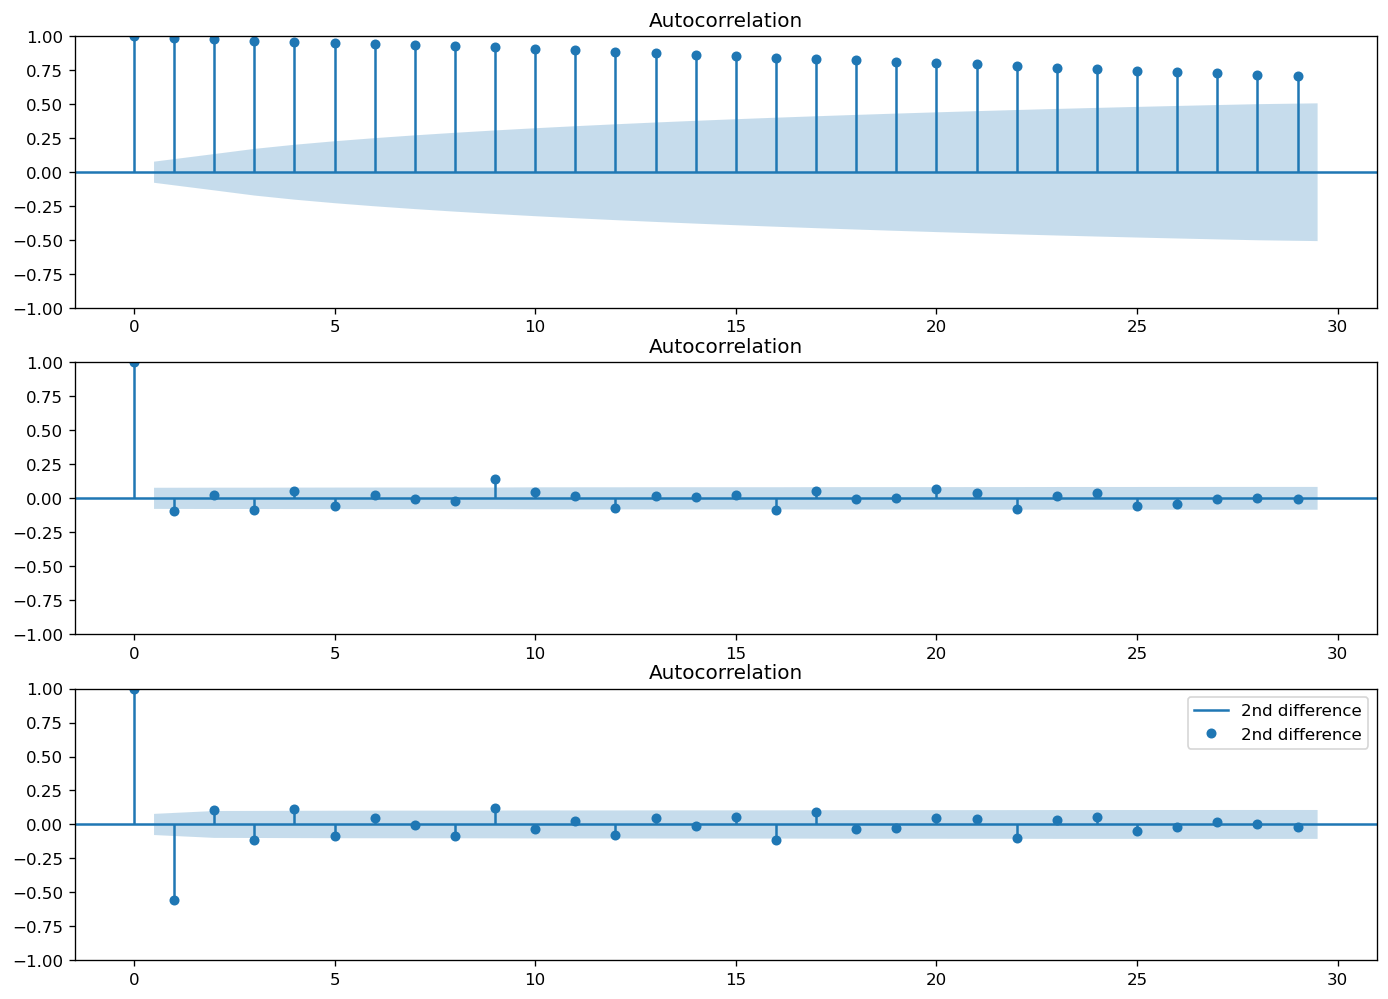

In [26]:
# checking the differencing "D" with Auto-Correlation Function(ACF)
plt.rcParams.update({'figure.figsize':(14,10), 'figure.dpi':120})
fig, (ax1, ax2, ax3) = plt.subplots(3)

plot_acf(df['adjclose'], ax=ax1, label='Actual data')

plot_acf(df['adjclose'].diff().dropna(), ax=ax2, label = '1st difference')

plot_acf(df['adjclose'].diff().diff().dropna(), ax=ax3, label = '2nd difference')
plt.legend()
plt.show()

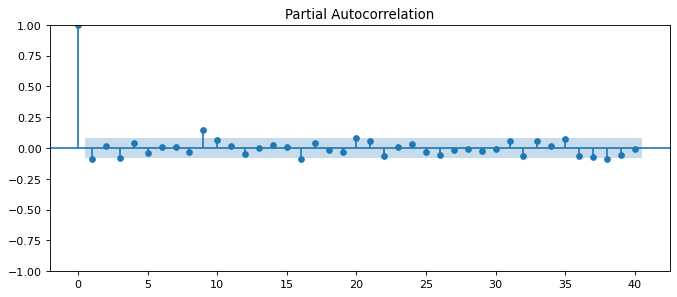

In [27]:
# Partial AutoCorrelation graph (PACF) to check for AutoRegresive(P) and Moving value(q) for the ARIMA model
plt.rcParams.update({'figure.figsize':(10,4), 'figure.dpi':80})
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df.adjclose.diff().dropna(),lags = 40)
plt.show()

In [28]:
# After visualizing with ACF and PACF graph , we may set the ARIMA orders as (p,d,q) = (1,1,1)

# Step 4: Machine Learning Model Selection

In [29]:
# We have applied the ARIMA(Auto-Regressive Integrated Moving Average) model with the orders (p,d,q) as (1,1,1) for the forecasting. ARIMA is a supervised learning
# algorithm used for the Regression and time-series analysis where the univariate data(Y) is dependent only on the time (X).

In [30]:
# fitting the ARIMA Model with the order(1,1,1) on the previous 74% data as a training set and then testing the models
# by comparing the test dataset (remaining 26% data) with the model predictions.
# numbers 
model_predictions = []
n_test_obser = len(testing_data)
for i in range(n_test_obser):
    model = ARIMA(training_data, order = (1,1,1))
    model_fit = model.fit()
    #output =model_fit.forecast(steps = 120)
    output = model_fit.forecast()
    y_hat = np.array(output[0])
    model_predictions.append(y_hat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

In [31]:
# Actual vs Predicted values
testing_data = np.round(testing_data[:], 4)
model_predictions= np.round(model_predictions[:],4)
testing_data = np.array(testing_data).reshape(-1,1)

data = pd.DataFrame(testing_data)
data["Predicted Values"] = model_predictions
data.head(10)

,0,Predicted Values
0,0.9526,0.9517
1,0.9175,0.9548
2,0.9367,0.9189
3,0.9533,0.9343
4,0.9373,0.9536
5,0.9105,0.9384
6,0.9072,0.9119
7,0.8885,0.9065
8,0.8863,0.8904
9,0.8987,0.8853


In [32]:
data.tail(10)

,0,Predicted Values
156,0.4535,0.4501
157,0.4419,0.4511
158,0.4412,0.4444
159,0.4590,0.4397
160,0.4618,0.4585
161,0.4516,0.4619
162,0.4462,0.4524
163,0.4468,0.4461
164,0.4419,0.4467
165,0.4296,0.4423


In [33]:
# Comparing the first 50 actual and predicted values
a = testing_data[:50].reshape(5,-1)
print("ACTUAL VALUES\n", a)

ACTUAL VALUES
 [[0.9526 0.9175 0.9367 0.9533 0.9373 0.9105 0.9072 0.8885 0.8863 0.8987]
 [0.8276 0.8406 0.8439 0.805  0.7567 0.7903 0.7815 0.7711 0.8969 0.7912]
 [0.7834 0.7619 0.7396 0.6101 0.629  0.5128 0.4737 0.5289 0.5394 0.5975]
 [0.5567 0.5781 0.5056 0.5333 0.5179 0.5283 0.5426 0.5126 0.5212 0.5139]
 [0.4809 0.4555 0.4648 0.4811 0.5701 0.6253 0.5527 0.5878 0.5597 0.5661]]


In [34]:
print("Predicted Values\n",model_predictions[:50] )

Predicted Values
 [0.9517 0.9548 0.9189 0.9343 0.9536 0.9384 0.9119 0.9065 0.8904 0.8853
 0.8984 0.8334 0.8358 0.8468 0.8063 0.7597 0.7857 0.7852 0.7696 0.888
 0.8056 0.7748 0.7691 0.7367 0.6223 0.6195 0.5285 0.4668 0.5289 0.5385
 0.5934 0.5627 0.5725 0.5151 0.525  0.5245 0.5232 0.5447 0.5137 0.5198
 0.5154 0.4826 0.4565 0.4634 0.4807 0.5631 0.6252 0.5586 0.5812 0.5662]


In [35]:
# Comparing the first 10 Actual and Predicted values

In [36]:
a = testing_data[:10].reshape(5,-1)
print("ACTUAL VALUES\n", a)

ACTUAL VALUES
 [[0.9526 0.9175]
 [0.9367 0.9533]
 [0.9373 0.9105]
 [0.9072 0.8885]
 [0.8863 0.8987]]


In [37]:
print("Predicted Values\n",model_predictions[:10] )

Predicted Values
 [0.9517 0.9548 0.9189 0.9343 0.9536 0.9384 0.9119 0.9065 0.8904 0.8853]


# Step5: Model Validation

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


#Method 1: Using R2 SCORE
print("Computing the R-squared value:")
r2_score = r2_score(testing_data,model_predictions[:])
print(f'r2_score:{r2_score}')

Computing the R-squared value:
r2_score:0.9456200434990082


In [39]:
# Method2: Report performance check with MEAN ABSOLUTE PERCENTAGE ERROR
MAPE = np.mean(np.abs(np.array(model_predictions[:]) - np.array(testing_data)) / np.abs(testing_data))
print(f'Mean_Absolute_Percentage_Error:{MAPE}')

Mean_Absolute_Percentage_Error:0.21837288231680685


In [40]:
# Method3: Using MEAN ABSOLUTE ERROR
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(model_predictions[:],testing_data)
print(f'Mean_Absolute_Error:{MAE}')

Mean_Absolute_Error:0.02115


In [41]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(model_predictions[:],testing_data)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.030873448451332882


# Step6: Visualization of Results

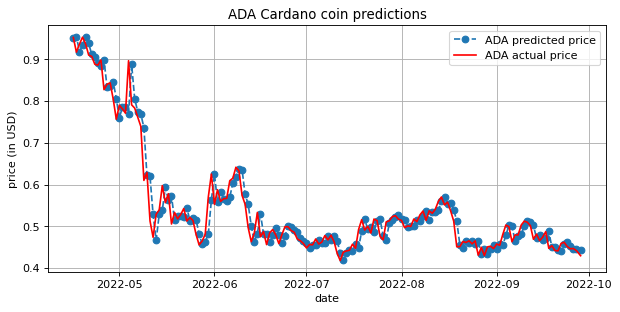

In [42]:
plt.figure(figsize=(9,4))
plt.grid(True)
date_range = df[to_row:].index
#plt.plot(date_range, model_predictions[:-1],color='blue',marker='o',linestyle ='dashed',label = "ADA predicted price")
plt.plot(date_range,model_predictions[:],marker='o',linestyle ='dashed',label = "ADA predicted price")
plt.plot(date_range,testing_data,color='red',label = "ADA actual price")
plt.title("ADA Cardano coin predictions")
plt.xlabel("date")
plt.ylabel('price (in USD)')
plt.legend()
plt.tight_layout
plt.show()

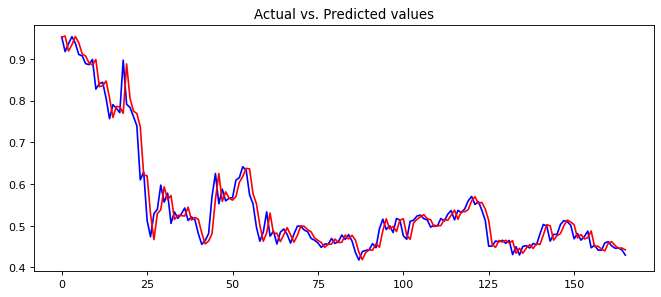

In [43]:
# Actual values Vs. Predicted Values
plt.plot(testing_data,color='blue')
plt.plot(model_predictions,color='red')
plt.title("Actual vs. Predicted values")
plt.show()

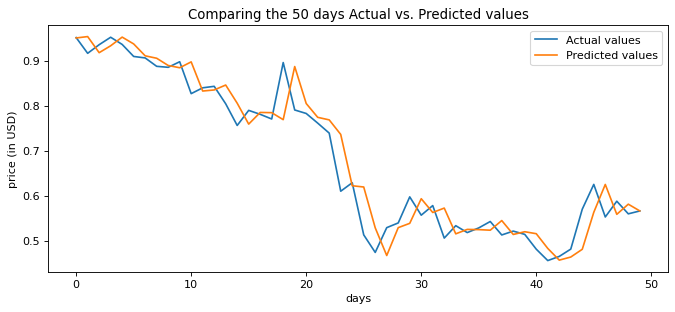

In [44]:
plt.plot(testing_data[:50],label = 'Actual values')
plt.plot(model_predictions[:50], label = 'Predicted values')
plt.title('Comparing the 50 days Actual vs. Predicted values')
plt.xlabel('days')
plt.ylabel('price (in USD)')
plt.legend()
plt.show()

In [45]:
# from statsmodels.graphics.tsaplots import plot_predict
# from statsmodels.tsa.arima.model import ARIMA

# plt.figure(figsize=(9,4))
# plot_predict(1,800)
# plt.title('Depicting the next forecasting range with 95% Confidence interval')
# plt.xlabel('Days')
# plt.ylabel('price (in USD)')
# plt.show()

# Step7: Forecasting of the next 10 days

In [46]:
# future_days = model_fit.forecast(steps=10)
# print(future_days)

In [47]:
data.head(10)

,0,Predicted Values
0,0.9526,0.9517
1,0.9175,0.9548
2,0.9367,0.9189
3,0.9533,0.9343
4,0.9373,0.9536
5,0.9105,0.9384
6,0.9072,0.9119
7,0.8885,0.9065
8,0.8863,0.8904
9,0.8987,0.8853


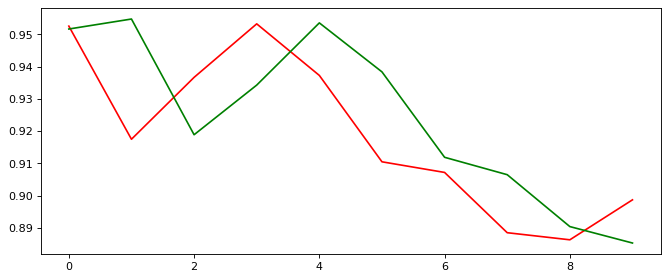

In [48]:
Actual = testing_data[:10]
predicted = model_predictions[:10]
plt.plot(Actual, color='red')k
plt.plot(predicted,color = 'green')

In [49]:
# performance Evaluation of 10 days Predictions

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
print("Computing the R-squared value:")
r2_score = r2_score(Actual,predicted)
print(f'r2_score:{r2_score}')

Computing the R-squared value:
r2_score:0.3445727793985951


In [51]:
# report performance
MAPE = np.mean(np.abs(np.array(predicted) - np.array(Actual)) / np.abs(Actual))
print(f'Mean_Absolute_Percentage_Error:{MAPE}')

Mean_Absolute_Percentage_Error:0.030542853213008016


In [52]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(Actual, predicted)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.019121976885249085


In [53]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(predicted,Actual))

0.01594000000000001
